<a href="https://colab.research.google.com/github/Nadiakhoo/SpotifyData2023/blob/main/Programming_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDClassifier, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score, roc_curve, auc
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_regression, mutual_info_classif, mutual_info_regression
from sklearn.neural_network import MLPRegressor, MLPClassifier
from time import time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV


# Part 1

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

In [ ]:
# Q1
df.info()
# Instances: 3539, Features: 33
# There are objects (15), float64 (11) and int64 (7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   C0                     3510 non-null   object 
 1   C1                     3539 non-null   object 
 2   C2                     3539 non-null   object 
 3   C3                     3539 non-null   object 
 4   C4                     3490 non-null   object 
 5   C5                     3431 non-null   object 
 6   C6                     3539 non-null   float64
 7   C7                     3539 non-null   object 
 8   C8                     3457 non-null   object 
 9   C9                     3397 non-null   object 
 10  C10                    3539 non-null   object 
 11  C11                    3381 non-null   object 
 12  C12                    3369 non-null   object 
 13  C13                    3419 non-null   object 
 14  C14                    3539 non-null   int64  
 15  C15 

In [ ]:
# Q2
df_missings = df.isnull().sum()
df_missings = df_missings[df_missings>0]
print("Columns with missing values: \n", df_missings)

print("The proportions of missing values are: \n", round(df_missings/3539 * 100, 2))

Columns with missing values: 
 C0      29
C4      49
C5     108
C8      82
C9     142
C11    158
C12    170
C13    120
C15    138
C17    148
C20    171
C22     16
C23     28
C25    144
C29    160
dtype: int64
The proportions of missing values are: 
 C0     0.82
C4     1.38
C5     3.05
C8     2.32
C9     4.01
C11    4.46
C12    4.80
C13    3.39
C15    3.90
C17    4.18
C20    4.83
C22    0.45
C23    0.79
C25    4.07
C29    4.52
dtype: float64


Continuous: ['C6', 'C17', 'C20', 'C22', 'C23', 'C25', 'C26', 'C28', 'C29', 'C30', 'regression target'] , 
Discrete: ['C14', 'C16', 'C18', 'C19', 'C21', 'C24', 'C27']
Mean: 
 C6     66.32
C14    23.20
C16     0.68
dtype: float64

Median:
 C6     66.55
C14    20.00
C16     0.00
dtype: float64

Range:
 C6     47.5
C14    53.0
C16    20.0
dtype: float64

Variance:
 C6     43.82
C14    55.17
C16     5.18
dtype: float64


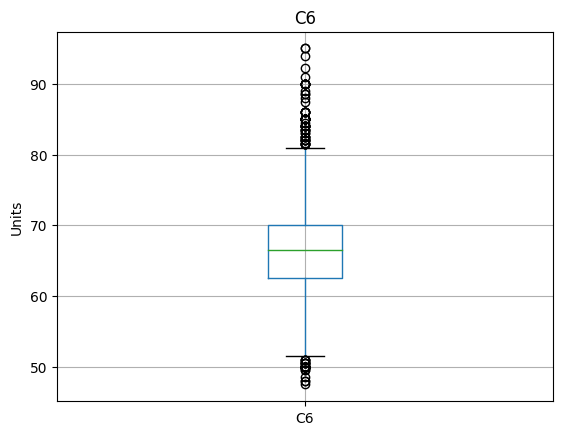

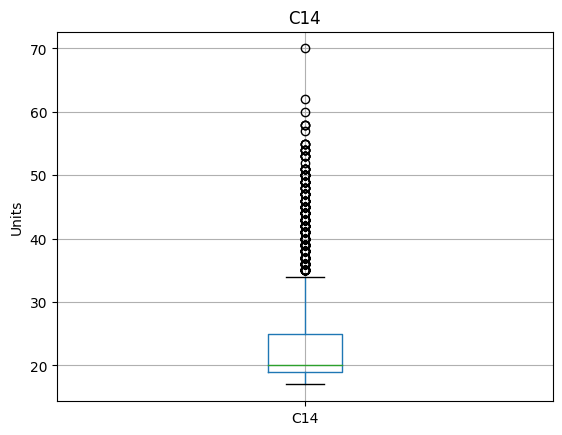

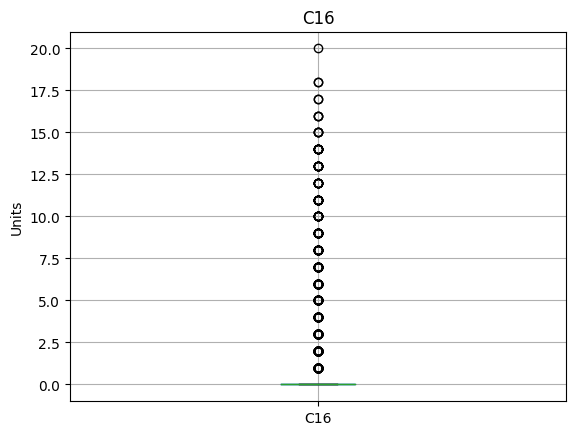

In [ ]:
# Q3a
# Discrete or Continuous
continuous = df.select_dtypes(include=["float64"]).columns.to_list()
discrete = df.select_dtypes(include=["int64"]).columns.to_list()
print("Continuous:", continuous, ", \nDiscrete:", discrete)

numerical_all = df.select_dtypes(include=["float64","int64"])
numerical = numerical_all.iloc[:, 0:3]

# Distribution statistics
numerical_mean = numerical.mean()
numerical_median = numerical.median()
numerical_max = numerical.max()
numerical_min = numerical.min()
numerical_range = numerical_max - numerical_min
numerical_variance = numerical.var()

print("Mean: \n",round(numerical_mean,2))
print("\nMedian:\n", round(numerical_median,2))
print("\nRange:\n", round(numerical_range,2))
print("\nVariance:\n", round(numerical_variance,2))

# Box plot distributions
for i in numerical.columns:
    numerical.boxplot(column=[i])
    plt.title(i)
    plt.ylabel('Units')
    plt.show()

Binary columns:
 ['C4', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C15', 'classification target'] 
Norminal columns:
 ['C0', 'C1', 'C3', 'C5', 'C7'] 
Ordinal columns:
 ['C2']

C0:
 single               3115
married               296
divorced               75
facto union            18
legally separated       3
widower                 3
Name: C0, dtype: int64

C1:
 1st phase - general contingent                         1351
2nd phase - general contingent                          708
Over 23 years old                                       630
Change of course                                        253
Technological specialization diploma holders            160
Holders of other higher courses                         109
3rd phase - general contingent                          105
Transfer                                                 67
Change of institution/course                             45
Short cycle diploma holders                              30
1st phase - special contingent (Made

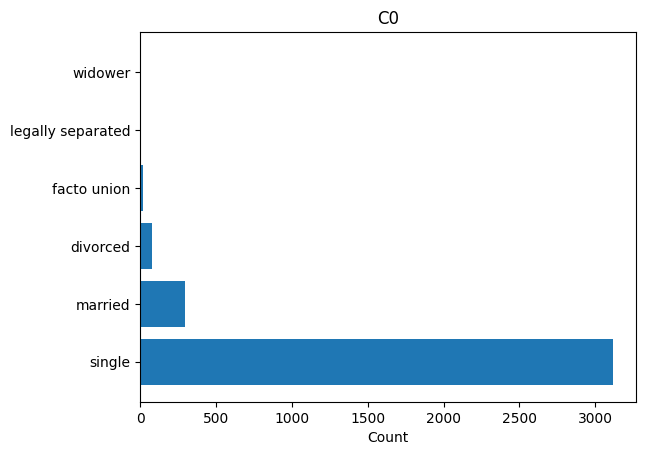

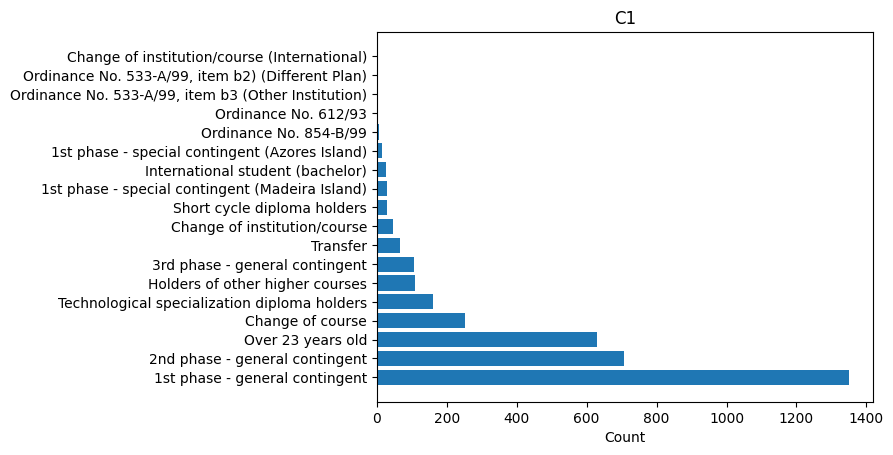

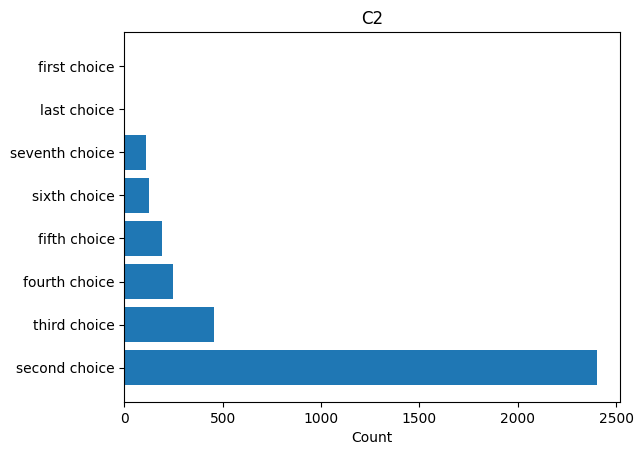

In [ ]:
# Q3b
# Binary or Nominal or Ordinal
categorical_all = df.select_dtypes(include=["object"])
categorical = categorical_all.iloc[:, 0:3]

# Identify binary (some have 2 categories, some have 3 categories due to NaN)
binary = []
for i in categorical_all.columns:
    unique_categories = len(df[i].unique())
    if unique_categories == 2 or unique_categories == 3:
        binary.append(i)

norminal_or_ordinal = categorical_all.drop(columns = binary)

# Through observation of norminal_or_ordinal, norminal and ordinal columns are
norminal = ['C0', 'C1', 'C3', 'C5', 'C7']
ordinal = ['C2']

print("Binary columns:\n", binary,
      "\nNorminal columns:\n", norminal,
      "\nOrdinal columns:\n", ordinal)

# For C0, C1, C2 category counts
for i in categorical:
  print(f'\n{i}:\n', categorical[i].value_counts())

# Bar plot distributions
for i in categorical.columns:
    counts = categorical[i].value_counts()
    plt.barh(counts.index, counts.values)
    plt.title(i)
    plt.xlabel('Count')
    plt.show()

In [ ]:
# Q4
# From above for reference
# numerical_all = df.select_dtypes(include=["float64","int64"])
# numerical = numerical_all.iloc[:, 0:3]

# Using quantiles
for i in numerical:
    q1 = numerical[i].quantile(0.25)
    q3 = numerical[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(f'Lower bound: {lower_bound} \nUpper bound: {upper_bound}')
    outliers = numerical[(numerical[i] < lower_bound) | (numerical[i] > upper_bound)][i]
    outlier_string = ", ".join(map(str, outliers))
    print(f'Potential outliers in {i}:\n', outlier_string,"\n")

# Using scipy
for i in numerical.columns:
    zscores = stats.zscore(numerical[i])
    scripy_outliers = numerical[(zscores < -3) | (zscores > 3)][i]
    print(f'Potential outliers in {i}:\n', scripy_outliers.tolist(), "\n")

Lower bound: 51.25 
Upper bound: 81.25
Potential outliers in C6:
 50.0, 50.0, 88.5, 84.0, 84.0, 85.0, 50.0, 86.0, 90.0, 82.0, 90.0, 85.0, 50.0, 85.0, 81.5, 85.0, 90.0, 83.5, 50.0, 50.0, 86.0, 50.0, 50.0, 85.0, 50.0, 50.0, 50.0, 50.0, 50.0, 85.0, 50.0, 85.0, 50.0, 50.0, 83.5, 50.0, 84.0, 50.5, 50.5, 50.0, 50.0, 50.0, 90.0, 50.0, 50.0, 84.0, 50.0, 49.5, 95.0, 50.0, 48.0, 50.0, 84.0, 85.0, 50.0, 50.0, 51.0, 84.5, 50.0, 48.0, 85.0, 83.5, 50.5, 51.0, 81.5, 83.0, 86.0, 50.0, 81.5, 50.0, 49.5, 85.0, 83.0, 84.0, 91.0, 81.5, 50.0, 86.0, 84.0, 47.5, 85.0, 83.5, 86.0, 50.0, 50.0, 82.5, 50.0, 50.0, 81.65, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 89.0, 94.0, 81.5, 50.0, 50.0, 51.0, 50.0, 50.0, 85.0, 50.0, 87.5, 92.2, 90.0, 50.0, 50.5, 85.0, 51.0, 88.0, 82.5, 85.0, 82.0, 86.0, 50.0, 50.0, 50.0, 50.0, 82.0, 48.5, 85.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 82.5, 50.5, 50.0, 90.0, 85.0, 85.0, 82.0, 90.0, 50.0, 82.5, 50.0, 95.0, 82.0, 50.0, 90.0, 88.5, 50.0 

Lower bound: 10.0 
Upper bound: 34.0
Potential out

<Axes: >

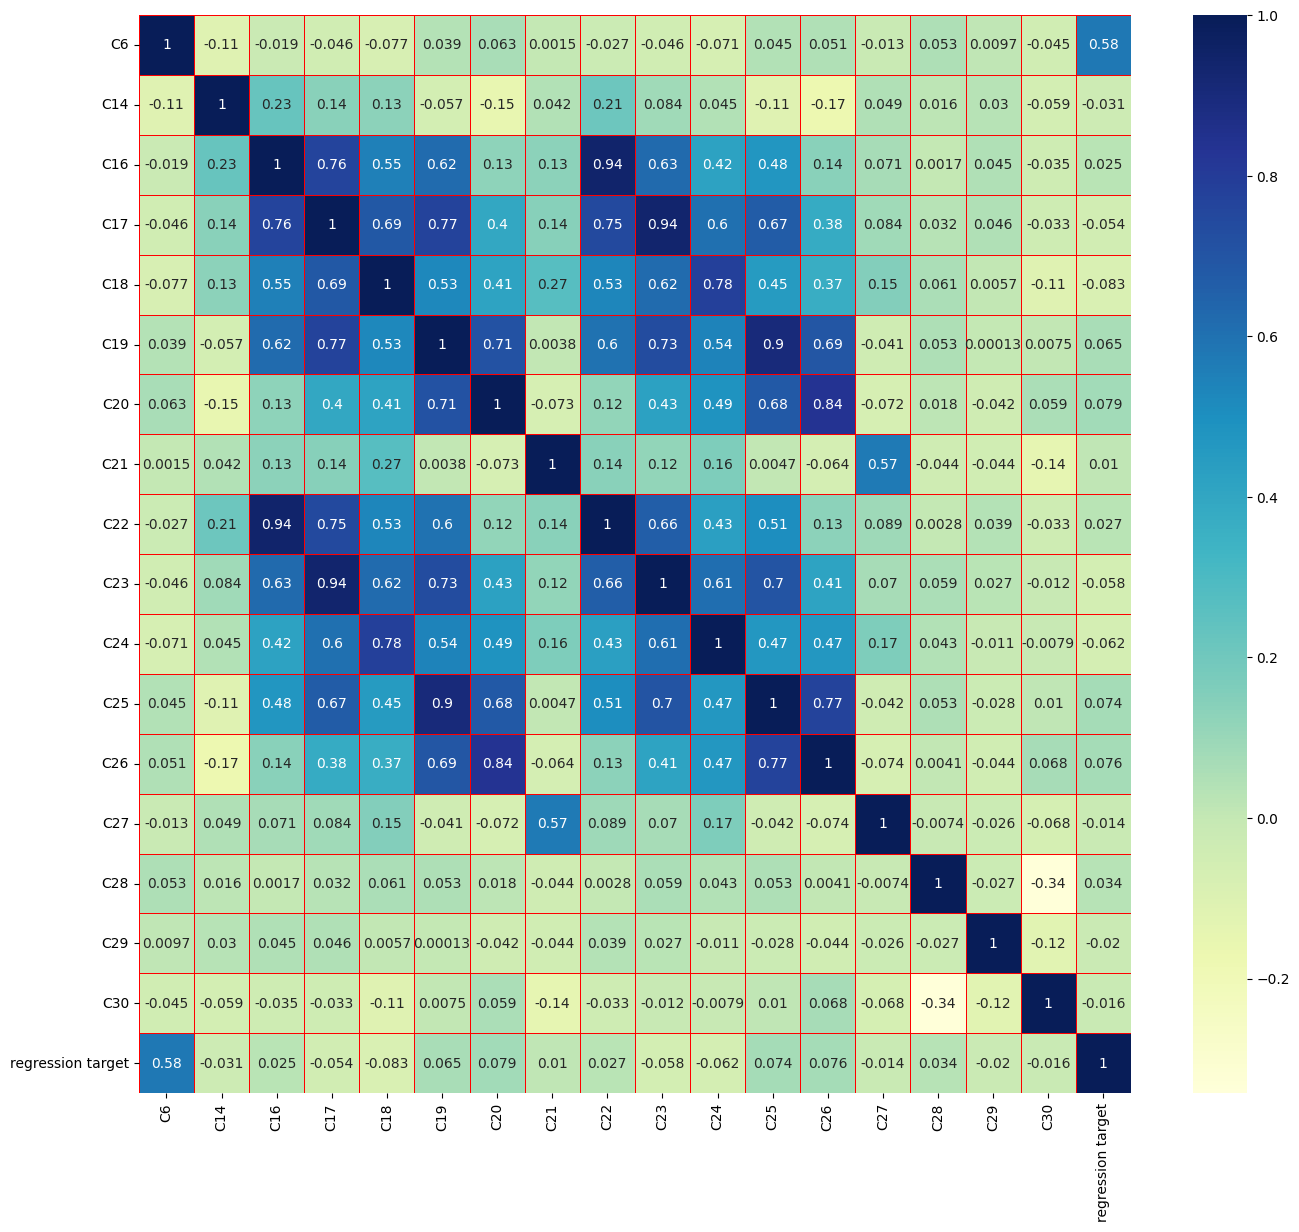

In [ ]:
#Q5
plt.figure(figsize=(16, 14))
sns.heatmap(numerical_all.corr(), annot=True, cmap='YlGnBu', linecolor='r', linewidths=0.5)

# Taking the threshold as 0.80, there are strong correlations for:
# C16 and C22, C17 and C23, C19 and C25, C20 and C26.

In [ ]:
# Q6
# Discussion in report

#Part 2

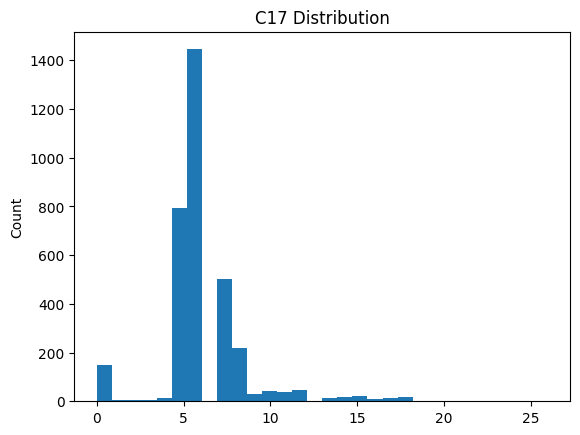

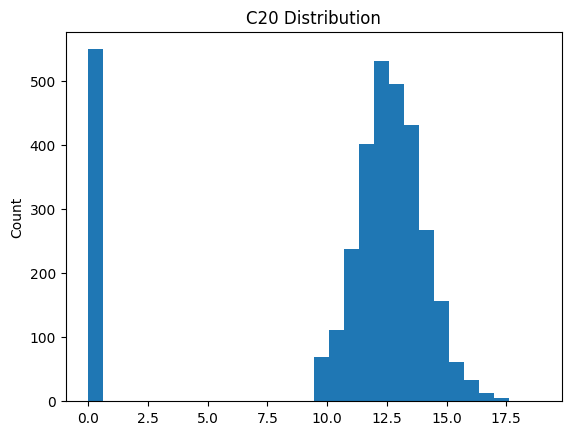

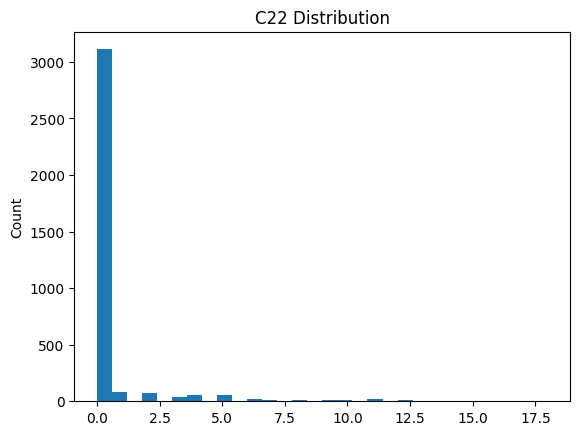

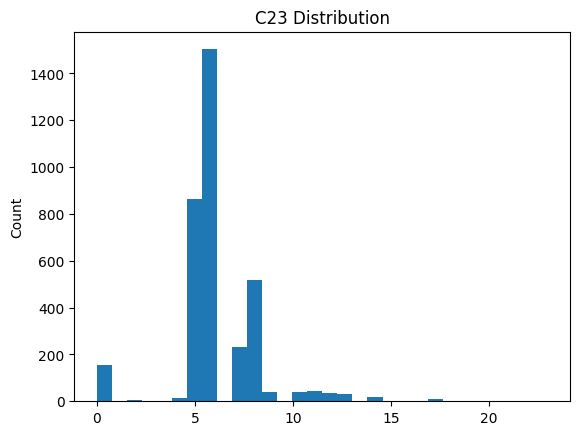

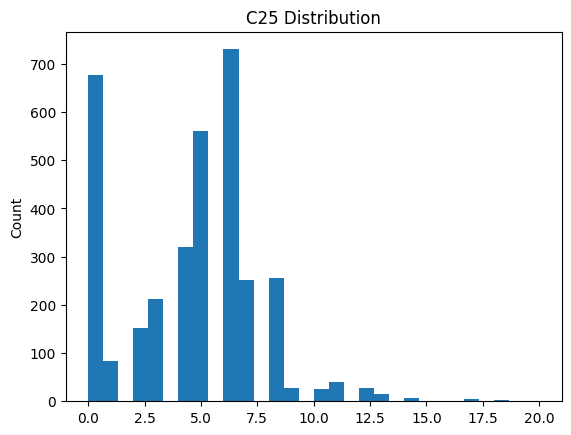

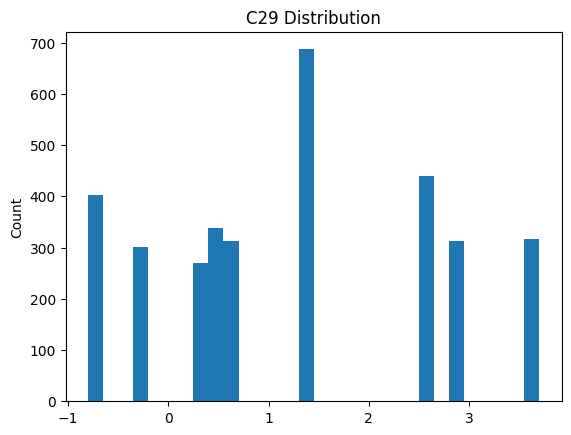

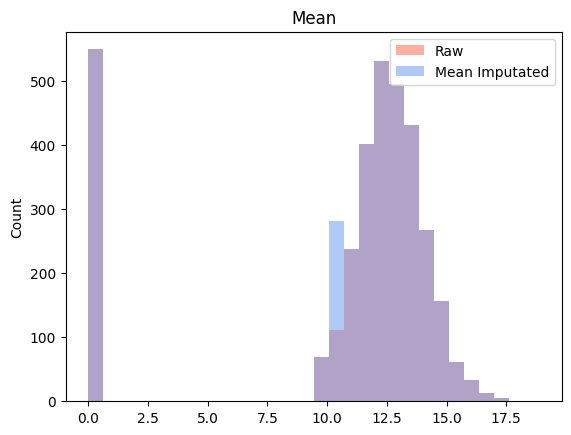

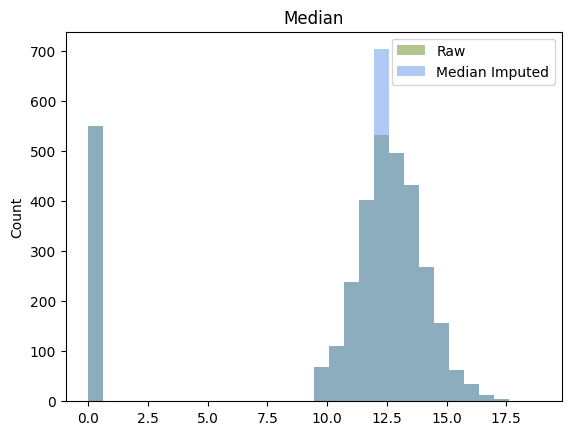

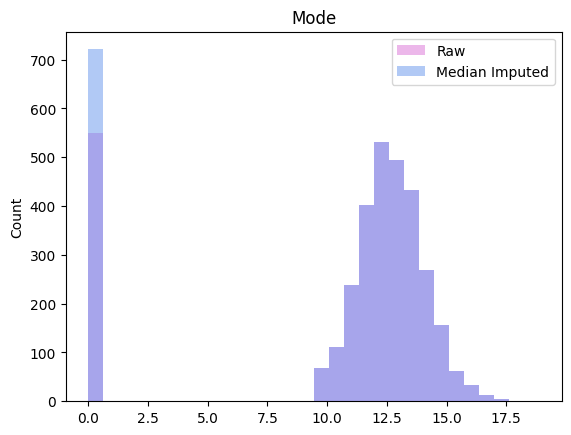

In [ ]:
#Q7

# Inputers defined from tutorial 2
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

# Features with missing values:
# Numerical: C17, C20, C22, C23, C25, C29
# Categorical: C0, C4, C5, C8, C9, C11, C12, C13, C15

numerical_missing = ["C17", "C20", "C22", "C23", "C25", "C29"]

# Check if each column has a normal or skewed distribution
for i in numerical_missing:
    plt.figure()
    plt.hist(df[i].dropna(), bins = 30)
    plt.ylabel('Count')
    plt.title(f'{i} Distribution')

# Testing mean vs median vs mode imputation for C20 (has skewed numerical distribution)
df1 = df.copy()
c20_values = df[['C20']].values

# C20 Mean, Median and Mode Imputation
df1['C20_mean_imputed'] = mean_imputer.fit_transform(c20_values)
df1['C20_median_imputed'] = median_imputer.fit_transform(c20_values)
df1['C20_mode_imputed'] = mode_imputer.fit_transform(c20_values)

# C20 Before and after mean imputed distribution
plt.figure()
plt.hist(c20_values[~np.isnan(c20_values)], bins = 30, color = 'tomato', alpha = 0.5, label = 'Raw')
plt.hist(df1['C20_mean_imputed'].dropna(), bins = 30, color = 'cornflowerblue', alpha = 0.5, label = 'Mean Imputated')
plt.ylabel('Count')
plt.title('Mean')
plt.legend()

# C20 Before and after median inputed distribution
plt.figure()
plt.hist(c20_values[~np.isnan(c20_values)], bins = 30, color = 'olivedrab', alpha = 0.5, label = 'Raw')
plt.hist(df1['C20_median_imputed'].dropna(), bins = 30, color = 'cornflowerblue', alpha = 0.5, label = 'Median Imputed')
plt.ylabel('Count')
plt.title('Median')
plt.legend()

# C20 Before and after mode inputed distribution
plt.figure()
plt.hist(c20_values[~np.isnan(c20_values)], bins = 30, color = 'orchid', alpha = 0.5, label = 'Raw')
plt.hist(df1['C20_mode_imputed'].dropna(), bins = 30, color = 'cornflowerblue', alpha = 0.5, label = 'Median Imputed')
plt.ylabel('Count')
plt.title('Mode')
plt.legend()

# This shows that for skewed data we should use median imputation,
# whereas for data with normal distribution we can use mean imputation
# Mode imputation may be possible for normal distributed data but,
# should work best for categorical data as they don't have median and mean

df2 = df.copy()

# From the above distributions, we can conclude that:
numerical_use_median = ["C17", "C20", "C22", "C23", "C25"]
numerical_use_mean = ["C29"]
# Categorical uses mode imputation
categorical_use_mode = ["C0", "C4", "C5", "C8", "C9", "C11", "C12", "C13", "C15"]

# Implementing imputation to all columns with missing values
# Mean Imputation
for i in numerical_use_mean:
    df2[i] = mean_imputer.fit_transform(df2[[i]])

# Median Imputation
for i in numerical_use_median:
    df2[i] = median_imputer.fit_transform(df2[[i]])

# Mode Imputation
for i in categorical_use_mode:
    df2[i] = mode_imputer.fit_transform(df2[[i]])


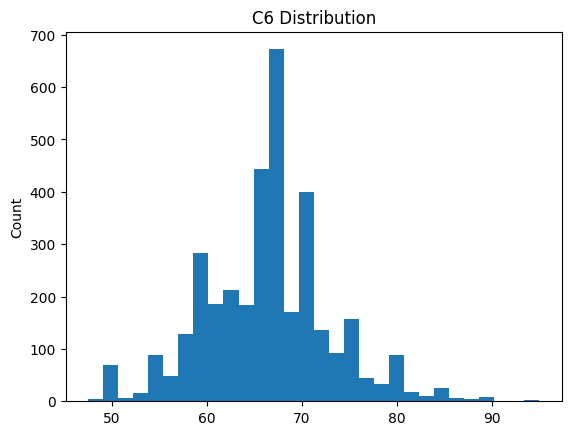

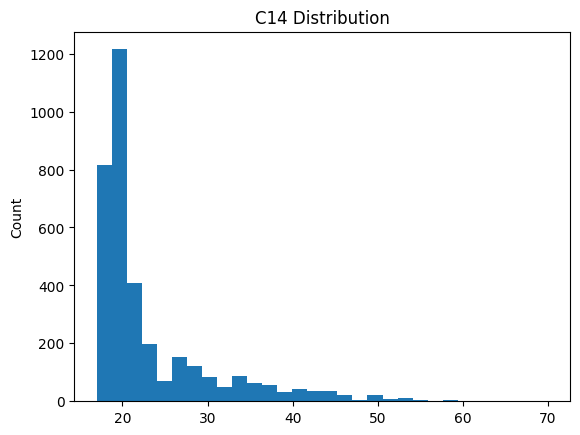

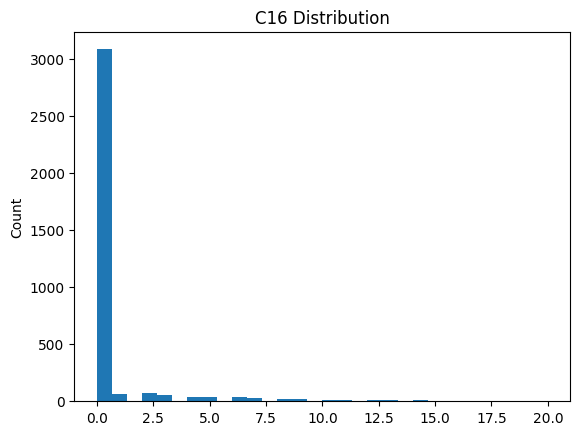

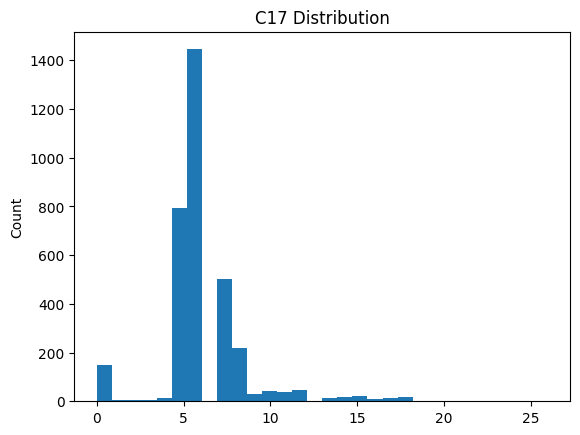

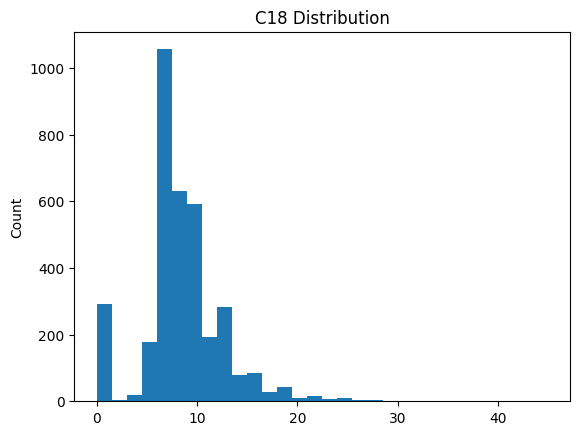

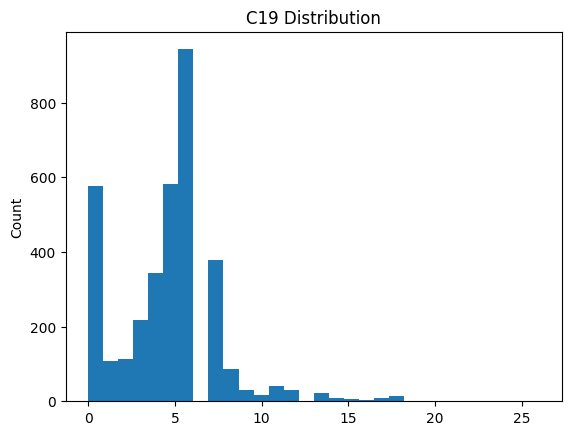

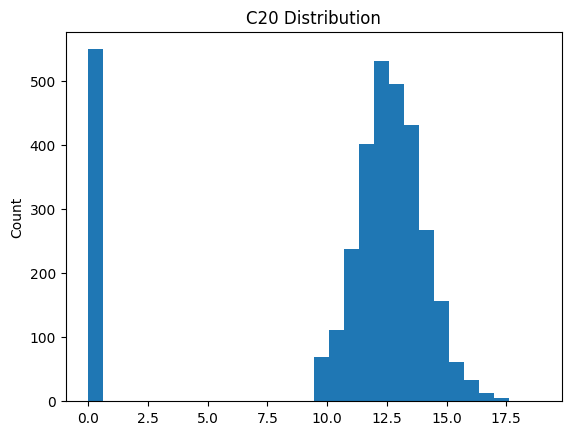

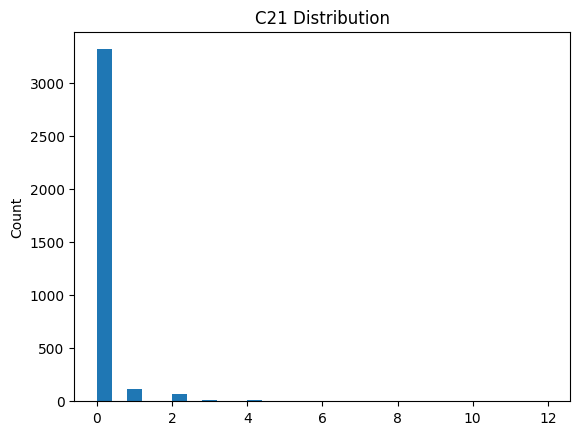

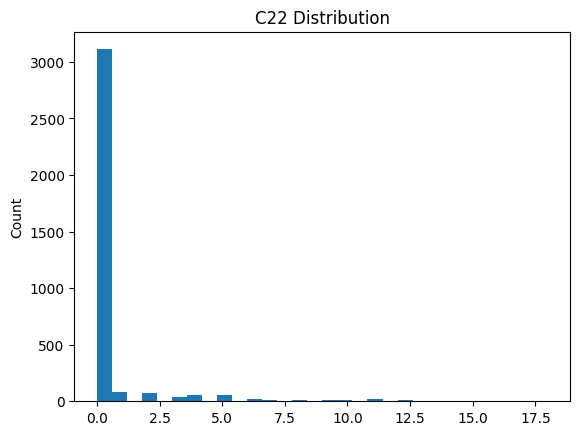

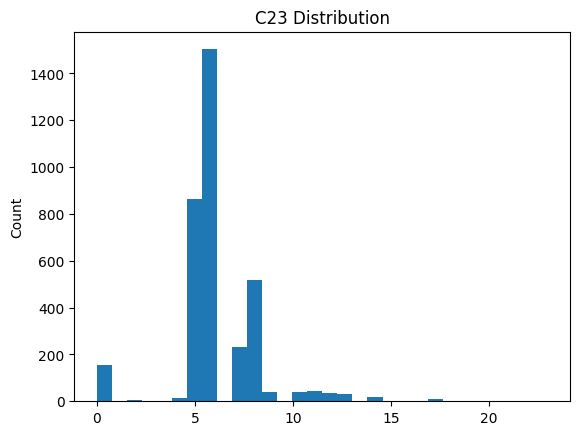

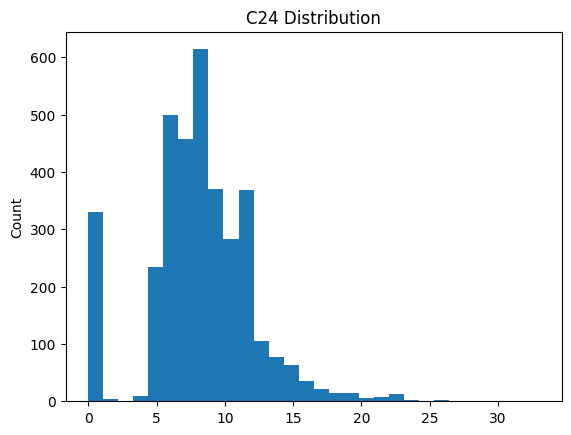

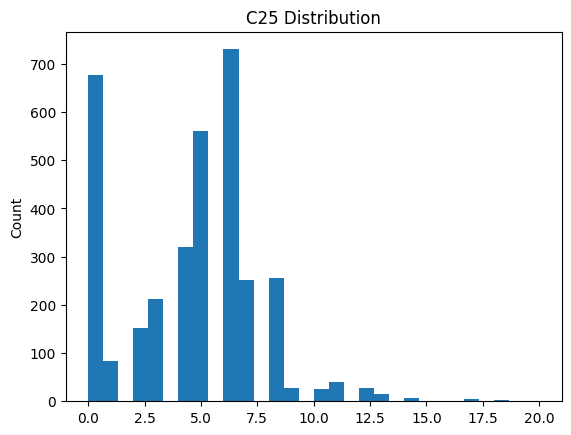

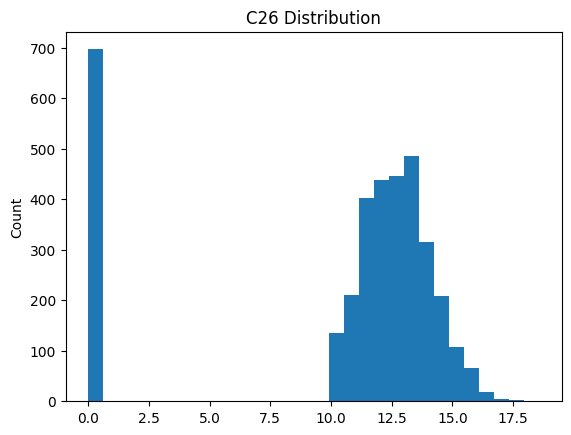

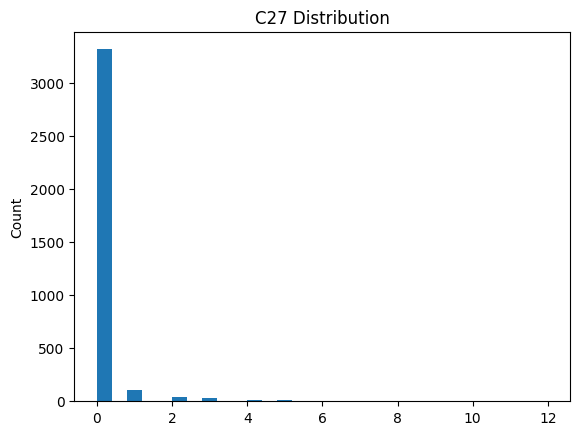

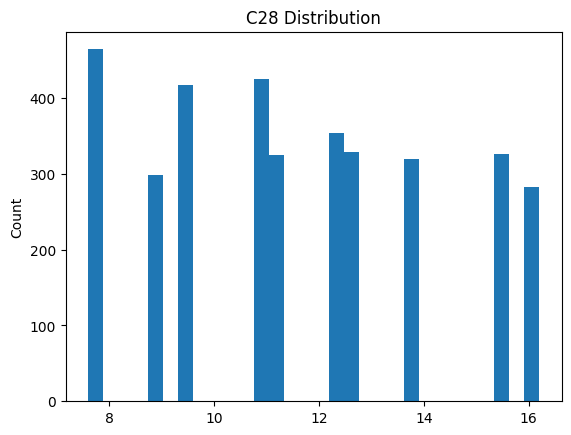

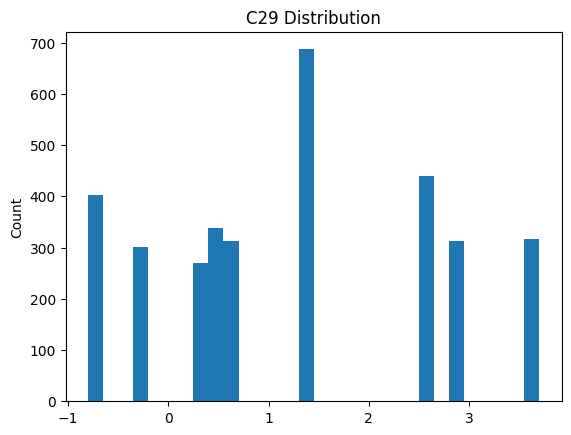

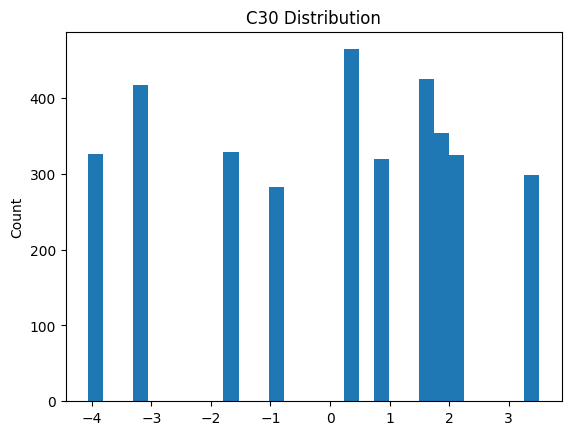

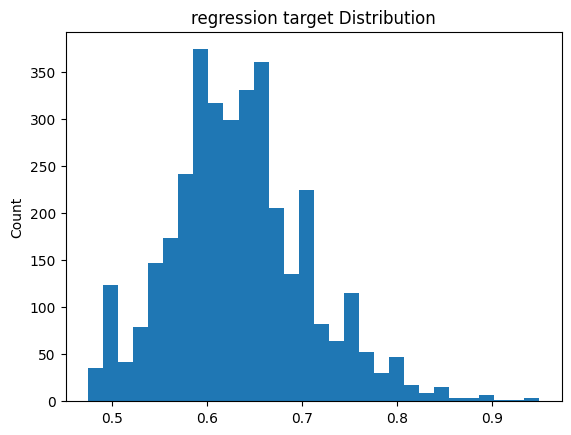

      C6   C6_rbst
0  65.00 -0.200135
1  65.00 -0.200135
2  59.50 -1.031074
3  66.55  0.034039
4  71.00  0.706344
5  70.00  0.555264
6  57.50 -1.333234
7  65.50 -0.124595
8  70.00  0.555264
9  80.00  2.066063


In [ ]:
# Q8

# From prior columns with missing values we have found that:
# Non-normally distributed/ Skewed:
# ["C17", "C20", "C22", "C23", "C25"]
# Normally distributed:
# ["C29"]

# Distributions for all numerical columns
for col in numerical_all:
    plt.figure()
    plt.hist(numerical_all[col].dropna(), bins = 30)
    plt.title(f'{col} Distribution')
    plt.ylabel('Count')
    plt.show()

# Updated list of distributions for numerical columns through observation:
# non-normal ["C14", "C16", "C17", "C18", "C19", "C20", "C21", "C22", "C23", "C24" "C25", "C26", "C27", "C30"]
# normal ["C6", "C28", "C29", "regression target"]

df3 = df2.copy()

# Scalers defined from tutorial 2
minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()
rbst_scaler = RobustScaler()

# Robust scaler comparison for C6
df3['C6_rbst'] = std_scaler.fit_transform(df3[['C6']])
print(df3[['C6', 'C6_rbst']].head(10))

# Applying scaler to all columns
df4 = df2.copy()

numerical_use_rbst = ["C14", "C16", "C17", "C18", "C19", "C20", "C21", "C22", "C23", "C24", "C25", "C26", "C27", "C30"]
# Since Robust Scaler better used when data contains outliers or skewed

numerical_use_std = ["C6", "C28", "C29", "regression target"]
# Since Standard Scaler better used when data is normally distributed

# Robust Scaler
for i in numerical_use_rbst:
    df4[i] = rbst_scaler.fit_transform(df4[[i]])

# Standard Scaler
for i in numerical_use_std:
    df4[i] = std_scaler.fit_transform(df4[[i]])

In [ ]:
# Q9
# From above for reference:
# categorical_all = df.select_dtypes(include=["object"])

norminal_binary_colnames = ['C0', 'C1', 'C3', 'C5', 'C7', 'C4', 'C8', 'C9',
                            'C10', 'C11', 'C12', 'C13', 'C15', 'classification target']
ordinal_colnames = ['C2']

df5 = df4.copy()

onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Showing the OneHotEncoder processing for C0
onehot_encoded = onehot_encoder.fit_transform(df5[['C0']])
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(['C0']))
# onehot_encoded_df
df5_merged = pd.concat([df5, onehot_encoded_df], axis=1)
print(df5_merged[['C0', 'C0_facto union', 'C0_legally separated', 'C0_married', 'C0_single', 'C0_widower']].head(10))

# Changing all categorical columns to encoded form
df6 = df4.copy()

# OrdinalEncoder for ordinal column C2
# Manually ordering the factors in C2
# df6['C2'].unique()
C2_factors = ['first choice', 'second choice', 'third choice', 'fourth choice', 'fifth choice',
'sixth choice', 'seventh choice', 'last choice']
ordinal_encoder_C2 = OrdinalEncoder(categories=[C2_factors])
ordinal_encoded = ordinal_encoder_C2.fit_transform(df6[['C2']])
df6['C2'] = ordinal_encoded

# OneHotEncoder for nominal and binary columns
for i in norminal_binary_colnames:
  onehot_encoded = onehot_encoder.fit_transform(df5[[i]])
  onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out([i]))
  df6 = pd.concat([df6, onehot_encoded_df], axis = 1)

# Removing the initial unencoded columns from the df
df6.drop(columns = norminal_binary_colnames, inplace = True)

         C0  C0_facto union  C0_legally separated  C0_married  C0_single  \
0  divorced             0.0                   0.0         0.0        0.0   
1    single             0.0                   0.0         0.0        1.0   
2    single             0.0                   0.0         0.0        1.0   
3   married             0.0                   0.0         1.0        0.0   
4    single             0.0                   0.0         0.0        1.0   
5    single             0.0                   0.0         0.0        1.0   
6    single             0.0                   0.0         0.0        1.0   
7    single             0.0                   0.0         0.0        1.0   
8    single             0.0                   0.0         0.0        1.0   
9    single             0.0                   0.0         0.0        1.0   

   C0_widower  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
5         0.0  
6         0.0  
7         0.0  
8         0.0  
9  

In [ ]:
# Q10a
# Using Variance Threshold, where threshold is 0.0025
df7 = df6.copy()

var_threshold = VarianceThreshold(threshold = 0.0025)
var_threshold.fit(df7)

vt_selected = df7.columns[var_threshold.get_support()]

vt_removed = df7.drop(columns = vt_selected).columns

df7 = df7[vt_selected]

vt_removed

Index(['C0_legally separated', 'C0_widower',
       'C1_Change of institution/course (International)',
       'C1_Ordinance No. 533-A/99, item b2) (Different Plan)',
       'C1_Ordinance No. 533-A/99, item b3 (Other Institution)',
       'C1_Ordinance No. 612/93', 'C1_Ordinance No. 854-B/99',
       'C3_Biofuel Production Technologies',
       'C5_10th year of schooling - not completed',
       'C5_11th year of schooling - not completed',
       'C5_Basic education 2nd cycle (6th/7th/8th year) or equiv.',
       'C5_Higher education - doctorate',
       'C5_Higher education - master (2nd cycle)',
       'C5_Higher education - master's', 'C7_Colombian', 'C7_Cuban',
       'C7_Dutch', 'C7_German', 'C7_Guinean', 'C7_Italian', 'C7_Lithuanian',
       'C7_Mexican', 'C7_Moldova (Republic of)', 'C7_Mozambican', 'C7_Russian',
       'C7_Turkish', 'C7_Ukrainian'],
      dtype='object')

In [ ]:
#10b
# Using SelectKBest, selecting top 25 features
df8 = df7.copy()

X = df8.drop(columns=['regression target'])
y = df8['regression target']

skbest = SelectKBest(score_func = mutual_info_regression, k = 25)
X_selected = skbest.fit_transform(X, y)

skb_selected = X.columns[skbest.get_support(indices = True)]
skb_removed = df8.drop(columns = skb_selected).columns

df8 = df8[skb_selected]

skb_removed

Index(['C21', 'C27', 'regression target', 'C0_facto union', 'C0_married',
       'C1_1st phase - special contingent (Azores Island)',
       'C1_1st phase - special contingent (Madeira Island)',
       'C1_3rd phase - general contingent', 'C1_Change of course',
       'C1_Change of institution/course',
       'C1_International student (bachelor)', 'C1_Short cycle diploma holders',
       'C1_Transfer', 'C3_Agronomy', 'C3_Animation and Multimedia Design',
       'C3_Basic Education', 'C3_Communication Design', 'C3_Equinculture',
       'C3_Informatics Engineering', 'C3_Journalism and Communication',
       'C3_Management', 'C3_Management (evening attendance)',
       'C3_Oral Hygiene', 'C3_Social Service',
       'C3_Social Service (evening attendance)', 'C3_Tourism',
       'C3_Veterinary Nursing', 'C5_12th year of schooling - not completed',
       'C5_Basic education 3rd cycle (9th/10th/11th year) or equiv.',
       'C5_Frequency of higher education',
       'C5_Higher education - ba

In [ ]:
# Q11
df_engineered = df8.copy()
df_engineered = np.log(df_engineered + 1e-10)

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


# Part 3

In [ ]:
# Q12 & Q13

df10 = df8.copy()
df10 = pd.concat([df10, y], axis=1)

# Chosen features from the 25 features remaining after preprocessing
features = ['C6', 'C18', 'C23', 'C1_Technological specialization diploma holders',
            'C5_Secondary education', 'C5_Technological specialization course']

X = df10[features]
y = df10['regression target']
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2, random_state = 4211)

# R2 and mean squared error rounded to 7 d.p.
for i in features:
  lr_model = LinearRegression()
  lr_fit = lr_model.fit(trainX[[i]], trainY)
  lr_predict = lr_fit.predict(testX[[i]])
  r2 = round(r2_score(testY, lr_predict), 7)
  mse = round(mean_squared_error(testY, lr_predict),7)
  print(f"\n{i}: \nR2: {r2} \nMSE: {mse}")

# Repeat for combined features
lr_model = LinearRegression()
lr_fit = lr_model.fit(trainX, trainY)
lr_predict = lr_fit.predict(testX)
r2 = round(r2_score(testY, lr_predict), 7)
mse = round(mean_squared_error(testY, lr_predict),7)
print(f"\nCombined features: \nR2: {r2} \nMSE: {mse}")



C6: 
R2: 0.3457983 
MSE: 0.6068057

C18: 
R2: 0.017852 
MSE: 0.9109929

C23: 
R2: 0.0084209 
MSE: 0.9197407

C1_Technological specialization diploma holders: 
R2: 0.0294123 
MSE: 0.9002701

C5_Secondary education: 
R2: 0.0204092 
MSE: 0.9086209

C5_Technological specialization course: 
R2: 0.0306895 
MSE: 0.8990854

Combined features: 
R2: 0.3721796 
MSE: 0.5823358


In [ ]:
# Q14
# Let C5 be the categorical feature chosen
features2 = ['C5_10th year of schooling - not completed',
             'C5_11th year of schooling - not completed',
             'C5_12th year of schooling - not completed',
             'C5_Basic education 2nd cycle (6th/7th/8th year) or equiv.',
             'C5_Basic education 3rd cycle (9th/10th/11th year) or equiv.',
             'C5_Frequency of higher education',
             'C5_Higher education - bachelor\'s degree',
             'C5_Higher education - degree',
             'C5_Higher education - degree (1st cycle)',
             'C5_Higher education - doctorate',
             'C5_Higher education - master (2nd cycle)',
             'C5_Higher education - master\'s',
             'C5_Other - 11th year of schooling',
             'C5_Professional higher technical course',
             'C5_Secondary education',
             'C5_Technological specialization course']

X = df6[features2]
y = df6['regression target']
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2, random_state = 4211)

# R2 and mean squared error rounded to 7 d.p.
lr_model = LinearRegression()
lr_fit = lr_model.fit(trainX[[i]], trainY)
lr_predict = lr_fit.predict(testX[[i]])
r2 = round(r2_score(testY, lr_predict), 7)
mse = round(mean_squared_error(testY, lr_predict),7)
print(f"C5: \nR2: {r2} \nMSE: {mse}")

C5: 
R2: 0.0306895 
MSE: 0.8990854


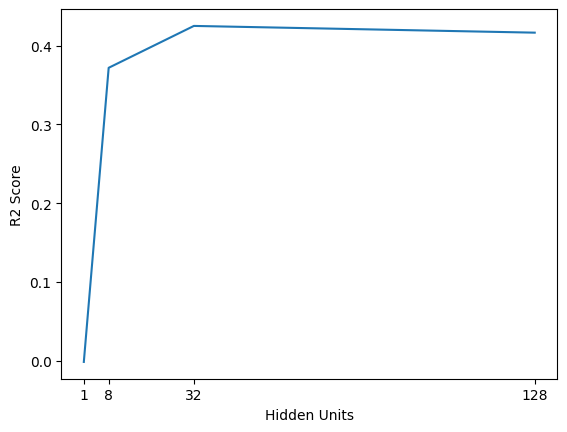

Hidden Units: 1
Training Time:
Mean: 0.33688 seconds 
SD: 0.01596
R2 Score:
Mean: -0.00151 
SD: 0.00000

Hidden Units: 8
Training Time:
Mean: 0.23340 seconds 
SD: 0.00212
R2 Score:
Mean: 0.37177 
SD: 0.00000

Hidden Units: 32
Training Time:
Mean: 1.58186 seconds 
SD: 0.33586
R2 Score:
Mean: 0.42491 
SD: 0.00000

Hidden Units: 128
Training Time:
Mean: 2.20103 seconds 
SD: 0.60453
R2 Score:
Mean: 0.41636 
SD: 0.00000



In [ ]:
# Q15
features = ['C6', 'C18', 'C23', 'C1_Technological specialization diploma holders',
            'C5_Secondary education', 'C5_Technological specialization course']

X = df10[features]
y = df10['regression target']

hidden_units = [1, 8, 32, 128]
mean_training_times = []
sd_training_times = []
mean_r2_scores = []
sd_r2_scores = []


for H in hidden_units:
  # Saving recorded time and R2 for each setting
  timeloop = []
  r2loop = []

  for i in range(3):
      trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2, random_state = 4211)
      mlp_model = MLPRegressor(hidden_layer_sizes=(H, H, H), early_stopping = True, max_iter = 1000,
                            random_state = 4211)

      # Record time taken for the model to train
      start_time = time()
      mlp_model.fit(trainX, trainY)
      end_time = time()
      time_taken = end_time - start_time
      timeloop.append(time_taken)

      # Get R2 score and save
      predY = mlp_model.predict(testX)
      r2 = r2_score(testY, predY)
      r2loop.append(r2)

  # Mean and standard deviation
  mean_training_times.append(np.mean(timeloop))
  sd_training_times.append(np.std(timeloop))
  mean_r2_scores.append(np.mean(r2loop))
  sd_r2_scores.append(np.std(r2loop))

# Mean R2 plot by H
plt.plot(hidden_units, mean_r2_scores)
plt.xlabel('Hidden Units')
plt.ylabel('R2 Score')
plt.xticks(hidden_units)
plt.show()

for i in range(4):
    print(f"Hidden Units: {hidden_units[i]}")
    print(f"Training Time:\nMean: {mean_training_times[i]:.5f} seconds \nSD: {sd_training_times[i]:.5f}")
    print(f"R2 Score:\nMean: {mean_r2_scores[i]:.5f} \nSD: {sd_r2_scores[i]:.5f}\n")


In [ ]:
# Q16
# In report

# Part 4

In [ ]:
# Q17
classification_trgt = df7['classification target_success']
df11 = df10.copy()
df11 = pd.concat([df11, classification_trgt], axis = 1)

X = df11[df8.columns]
y = df11['classification target_success']

trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2, random_state = 4211)

# Let the step size be 0.05
step_size = 0.05

mean_training_times = []
sd_training_times = []
mean_accuracies = []
sd_accuracies = []
mean_f1s = []
sd_f1s = []

for i in range(3):
    model = SGDClassifier(loss = 'log_loss', eta0 = step_size, learning_rate = 'constant',
                          max_iter = 1000, random_state = 4211)

    # Record time taken for the model to train
    start_time = time()
    model.fit(trainX, trainY)
    end_time = time()
    time_taken = end_time - start_time
    mean_training_times.append(time_taken)

    # Get F1 score and accuracy
    predY = model.predict(testX)
    accuracy = accuracy_score(testY, predY)
    f1 = f1_score(testY, predY)
    mean_accuracies.append(accuracy)
    mean_f1s.append(f1)

# Mean and standard deviation for training times, accuracy and F1 score
sd_training_times = round(np.std(mean_training_times), 5)
mean_training_times = round(np.mean(mean_training_times), 5)
sd_accuracies = round(np.std(mean_accuracies), 5)
mean_accuracies = round(np.mean(mean_accuracies), 5)
sd_f1s = round(np.std(mean_f1s), 5)
mean_f1s = round(np.mean(mean_f1s), 5)

print("Step size:", step_size)
print("\nTraining Time:\nMean:", mean_training_times, "\nSD:", sd_training_times)
print("\nAccuracy:\nMean:", mean_accuracies, "\nSD:", sd_accuracies)
print("\nF1 Score:\nMean:", mean_f1s, "\nSD:", sd_f1s)



Step size: 0.05

Training Time:
Mean: 0.01432 
SD: 0.00137

Accuracy:
Mean: 0.84605 
SD: 0.0

F1 Score:
Mean: 0.89111 
SD: 0.0


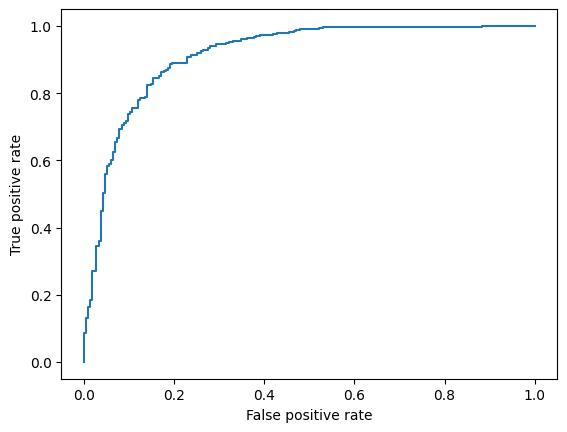

AUC: 0.91403 (to 5 d.p.)


In [ ]:
# Q18
# From previous part:
# X = df11[df8.columns]
# y = df11['classification target_success']
# trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2, random_state = 4211)

# Logistic regression model
lr_model = LogisticRegression(max_iter = 1000)
lr_model.fit(trainX, trainY)
y_probability = lr_model.predict_proba(testX)[:, 1]

# ROC calculations
false_positive_rate, true_positive_rate, thresholds = roc_curve(testY, y_probability)
auc_value = round(auc(false_positive_rate, true_positive_rate), 5)

plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
print("AUC:", auc_value, "(to 5 d.p.)")


In [ ]:
# Q19
# From above for reference:
# X = df11[df8.columns]
# y = df11['classification target_success']
# trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2, random_state = 4211)

etas = [0.001, 0.01, 0.1]

for j in etas:
  mean_training_times = []
  sd_training_times = []
  mean_accuracies = []
  sd_accuracies = []
  mean_f1s = []
  sd_f1s = []

  for i in range(3):
      model = SGDClassifier(loss = 'log_loss', eta0 = j, learning_rate = 'constant',
                            max_iter = 1000, random_state = 4211)

      # Record time taken for the model to train
      start_time = time()
      model.fit(trainX, trainY)
      end_time = time()
      time_taken = end_time - start_time
      mean_training_times.append(time_taken)

      # Get F1 score and accuracy
      predY = model.predict(testX)
      accuracy = accuracy_score(testY, predY)
      f1 = f1_score(testY, predY)
      mean_accuracies.append(accuracy)
      mean_f1s.append(f1)

  # Mean and standard deviation for training times, accuracy and F1 score
  sd_training_times = round(np.std(mean_training_times), 5)
  mean_training_times = round(np.mean(mean_training_times), 5)
  sd_accuracies = round(np.std(mean_accuracies), 5)
  mean_accuracies = round(np.mean(mean_accuracies), 5)
  sd_f1s = round(np.std(mean_f1s), 5)
  mean_f1s = round(np.mean(mean_f1s), 5)

  print("\nStep size:", j)
  print("\nTraining Time:\nMean:", mean_training_times, "\nSD:", sd_training_times)
  print("\nAccuracy:\nMean:", mean_accuracies, "\nSD:", sd_accuracies)
  print("\nF1 Score:\nMean:", mean_f1s, "\nSD:", sd_f1s)


Step size: 0.001

Training Time:
Mean: 0.02497 
SD: 0.00295

Accuracy:
Mean: 0.86299 
SD: 0.0

F1 Score:
Mean: 0.90771 
SD: 0.0

Step size: 0.01

Training Time:
Mean: 0.01582 
SD: 0.00036

Accuracy:
Mean: 0.85593 
SD: 0.0

F1 Score:
Mean: 0.89881 
SD: 0.0

Step size: 0.1

Training Time:
Mean: 0.01016 
SD: 0.00211

Accuracy:
Mean: 0.86299 
SD: 0.0

F1 Score:
Mean: 0.90823 
SD: 0.0


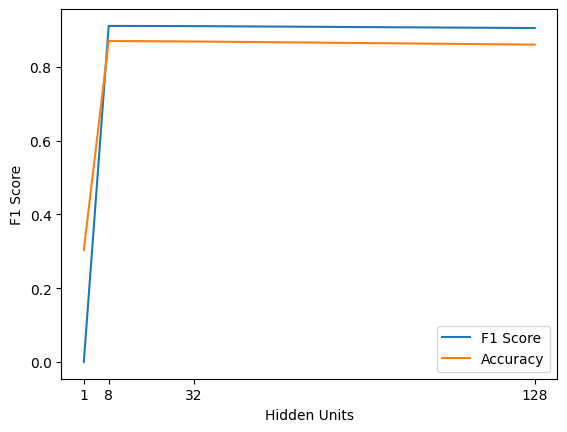


Hidden Units: 1
Training Time:
Mean: 0.34501 seconds 
SD: 0.03203

Accuracy: 
Mean:0.30367 
SD: 0.0

F1 Score: 
Mean: 0.0 
SD: 0.0


Hidden Units: 8
Training Time:
Mean: 1.29402 seconds 
SD: 0.25564

Accuracy: 
Mean:0.87006 
SD: 0.0

F1 Score: 
Mean: 0.91085 
SD: 0.0


Hidden Units: 32
Training Time:
Mean: 1.7874 seconds 
SD: 0.07606

Accuracy: 
Mean:0.86864 
SD: 0.0

F1 Score: 
Mean: 0.91032 
SD: 0.0


Hidden Units: 128
Training Time:
Mean: 4.05067 seconds 
SD: 1.36649

Accuracy: 
Mean:0.86017 
SD: 0.0

F1 Score: 
Mean: 0.90508 
SD: 0.0



In [ ]:
# Q20 Q21

X = df11[df8.columns]
y = df11['classification target_success']

hidden_units = [1, 8, 32, 128]

training_times = []
accuracy_scores = []
f1_scores = []

for H in hidden_units:
    timesloop = []
    accuracyloop = []
    f1loop = []

    for i in range(3):
        trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2, random_state = 4211)
        mlp_c_model = MLPClassifier(hidden_layer_sizes=(H, H, H, H), max_iter = 1000,
                                    early_stopping = True, random_state = 4211)

        # Record time taken for the model to train
        start_time = time()
        mlp_c_model.fit(trainX, trainY)
        end_time = time()
        timesloop.append(end_time - start_time)

        # Get F1 score and accuracy
        predY = mlp_c_model.predict(testX)
        accuracy = accuracy_score(testY, predY)
        f1 = f1_score(testY, predY)
        accuracyloop.append(accuracy)
        f1loop.append(f1)

    # Calculate mean and standard deviation
    mean_time = round(np.mean(timesloop), 5)
    std_time = round(np.std(timesloop), 5)
    mean_accuracy = round(np.mean(accuracyloop), 5)
    std_accuracy = round(np.std(accuracyloop), 5)
    mean_f1 = round(np.mean(f1loop), 5)
    std_f1 = round(np.std(f1loop), 5)
    training_times.append((mean_time, std_time))
    accuracy_scores.append((mean_accuracy, std_accuracy))
    f1_scores.append((mean_f1, std_f1))

plt.plot(hidden_units, [i[0] for i in f1_scores], label = 'F1 Score')
plt.plot(hidden_units, [i[0] for i in accuracy_scores], label='Accuracy')
plt.xticks(hidden_units)
plt.xlabel('Hidden Units')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

for i in range(4):
    print(f"\nHidden Units: {hidden_units[i]}")
    print(f"Training Time:\nMean: {training_times[i][0]} seconds \nSD: {training_times[i][1]}\n")
    print(f"Accuracy: \nMean:{accuracy_scores[i][0]} \nSD: {accuracy_scores[i][1]}\n")
    print(f"F1 Score: \nMean: {f1_scores[i][0]} \nSD: {f1_scores[i][1]}\n")


In [ ]:
# Q22 Q23
# In report

# Part 5

In [ ]:
# Q24

X = df.drop(columns=['classification target', 'regression target'])
y = df['classification target']

numerical_col = X.select_dtypes(include=['int64', 'float64']).columns
categorical_col = X.select_dtypes(include=['object']).columns

# Using Pipeline
numerical_pipeline = Pipeline(steps = [('simpleimputer', SimpleImputer(strategy = 'mean')), ('standardcaler', StandardScaler())])
categorical_pipeline = Pipeline(steps = [('onehotencoder', OneHotEncoder(handle_unknown = 'ignore'))])

# Using ColumnTransformer
col_transformer = ColumnTransformer(transformers = [('numerical', numerical_pipeline, numerical_col), ('categorical', categorical_pipeline, categorical_col)])

trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2, random_state = 4211)

# Using MLPClassifier and validate
mlp_c_model = MLPClassifier(hidden_layer_sizes = (32, 32, 32), max_iter = 1000, early_stopping = True)
pipeline = Pipeline(steps=[('preprocessor', col_transformer), ('classifier', mlp_c_model)])
pipeline.fit(trainX, trainY)

# Find accuracy and F1 score
y_pred = pipeline.predict(testX)
accuracy = round(accuracy_score(testY, y_pred), 5)
f1 = round(f1_score(testY, y_pred, pos_label = 'success'), 5)

print("Accuracy:", accuracy)
print("F1 Score:", f1)

In [ ]:
# Q25

ordinal_features = ['C2']

# Using Pipeline
numerical_pipeline = Pipeline(steps = [('simpleimputer', SimpleImputer(strategy = 'constant', fill_value = 0)), ('standardcaler', StandardScaler())])
categorical_pipeline = Pipeline(steps = [('onehotencoder', OneHotEncoder(handle_unknown = 'ignore'))])
ordinal_pipeline = Pipeline(steps = [('ordinalencoder', OrdinalEncoder())])

# Using ColumnTransformer
col_transformer = ColumnTransformer(transformers=[('numerical', numerical_pipeline, numerical_col),('categorical', categorical_pipeline, categorical_col),('ordinal', ordinal_pipeline, ordinal_features)])

trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2, random_state = 4211)

# Using MLPClassifier and validate
mlp_c_model = MLPClassifier(hidden_layer_sizes = (32, 32, 32), max_iter = 1000, early_stopping = True)
pipeline = Pipeline(steps=[('preprocessor', col_transformer), ('classifier', mlp_c_model)])
pipeline.fit(trainX, trainY)

# Find accuracy and F1 score
y_pred = pipeline.predict(testX)
accuracy = round(accuracy_score(testY, y_pred), 5)
f1 = round(f1_score(testY, y_pred, pos_label = 'success'), 5)

print("Accuracy:", accuracy)
print("F1 Score:", f1)


In [ ]:
# Q26
# After testing different imputation + scaler combinations,
# Median Imputation + Robust Scaler had the highest accuracy and F1 score

# Using Pipeline
numerical_pipeline = Pipeline(steps = [('simpleimputer', SimpleImputer(strategy = 'median')), ('robustscaler', RobustScaler())])
categorical_pipeline = Pipeline(steps = [('onehotencoder', OneHotEncoder(handle_unknown = 'ignore'))])

# Using ColumnTransformer
col_transformer = ColumnTransformer(transformers = [('numerical', numerical_pipeline, numerical_col), ('categorical', categorical_pipeline, categorical_col)])

trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2, random_state = 4211)

# Using MLPClassifier and validate
mlp_c_model = MLPClassifier(hidden_layer_sizes=(32, 32, 32), max_iter = 1000, early_stopping = True)
pipeline = Pipeline(steps=[('preprocessor', col_transformer), ('classifier', mlp_c_model)])
pipeline.fit(trainX, trainY)

# Find accuracy and F1 score
y_pred = pipeline.predict(testX)
accuracy = round(accuracy_score(testY, y_pred), 5)
f1 = round(f1_score(testY, y_pred, pos_label = 'success'), 5)

print("Accuracy:", accuracy)
print("F1 Score:", f1)


In [ ]:
# Q27

mlp_c_model = MLPClassifier(random_state = 4211, early_stopping = True)

pipeline = Pipeline(steps=[('preprocessor', col_transformer), ('classifier', mlp_c_model)])

param_grid = {
    'classifier__hidden_layer_sizes': [(50, 50, 50), (100, 100, 100), (200, 200, 200)],
    'classifier__activation': ['relu', 'tanh', 'logistic'],
    'classifier__alpha': [0.0001, 0.001, 0.01],
    'classifier__learning_rate': ['constant', 'adaptive'],
    'classifier__learning_rate_init': [0.001, 0.01, 0.1]}

grid_search = GridSearchCV(pipeline, param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(trainX, trainy)
